In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
df_HVC = pd.read_excel('HCP_Data_KDAG_Hackathon.xlsx')

**Observation** 

1. There are total of 10000 HCPs data

## Exploratory Data Analysis

In [ ]:
df_HVC.shape

(570000, 11)

In [ ]:
df_HVC.dtypes

Physician_ID                  object
Time_Period                    int64
Brand_Rx                     float64
Market_Rx                    float64
Sales_Rep_Calls                int64
Samples_Dropped                int64
Physician_Segment             object
Emails_Delivered               int64
Speaker_Programs_Attended      int64
Vouchers_Dropped               int64
Specialty                     object
dtype: object

In [ ]:
df_HVC['Physician_Segment'].nunique()

3

In [ ]:
df_HVC['Speaker_Programs_Attended'].isin([0]).sum()

566751

**Observation**

1. Almost all of the values under this column is 0 so we will better    drop this column

In [ ]:
#Dropping Speaker_Programs_Attended column
df_HVC.drop('Speaker_Programs_Attended', axis = 1, inplace =True)

In [ ]:
df_HVC.head()

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Vouchers_Dropped,Specialty
0,axt00001,20190104,0.0,2.80567,1,0,3-Low,0,0,Dermatologist
1,axt00001,20190111,0.0,20.57312,1,0,3-Low,0,0,Dermatologist
2,axt00001,20190118,0.0,6.16010,1,0,3-Low,0,0,Dermatologist
3,axt00001,20190125,0.0,8.95501,1,5,3-Low,0,0,Dermatologist
4,axt00001,20190201,0.0,9.13793,1,0,3-Low,0,0,Dermatologist


**NOTE** 

The Time_Period column is also not of that significance since no particular date will be that useful in the prediction of Brand_Rx

In [ ]:
df_HVC.drop('Time_Period', axis =1, inplace =True)

In [ ]:
df_HVC.head()

,Physician_ID,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Vouchers_Dropped,Specialty
0,axt00001,0.0,2.80567,1,0,3-Low,0,0,Dermatologist
1,axt00001,0.0,20.57312,1,0,3-Low,0,0,Dermatologist
2,axt00001,0.0,6.16010,1,0,3-Low,0,0,Dermatologist
3,axt00001,0.0,8.95501,1,5,3-Low,0,0,Dermatologist
4,axt00001,0.0,9.13793,1,0,3-Low,0,0,Dermatologist


In [ ]:
df_Specialty = df_HVC.groupby(['Specialty']).sum()['Brand_Rx'].to_frame().reset_index()
df_Specialty

,Specialty,Brand_Rx
0,Dermatologist,318419.943
1,General Physician,58398.792
2,Nurse Practitioner,12393.318


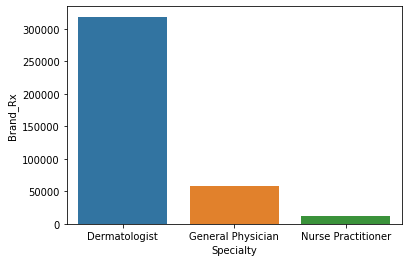

In [ ]:
sns.barplot(x = 'Specialty', y ='Brand_Rx', data = df_HVC.groupby(['Specialty']).sum()['Brand_Rx'].to_frame().reset_index())

In [ ]:
df_HVC['Specialty'].value_counts()

Dermatologist         456798
General Physician      90687
Nurse Practitioner     22515
Name: Specialty, dtype: int64

In [ ]:
df_Specialty['Total'] = [456798, 90687, 22515]
df_Specialty

,Specialty,Brand_Rx,Total
0,Dermatologist,318419.943,456798
1,General Physician,58398.792,90687
2,Nurse Practitioner,12393.318,22515


**Observation**

1. For the different promotional strategies adopted, among the **Specialty** Dermatogist has great impact on **Brand_Rx** followed by General Physician and then Nurse Practitioner

In [ ]:
df_Specialty['Ratio'] = df_Specialty["Brand_Rx"]/df_Specialty["Total"] 

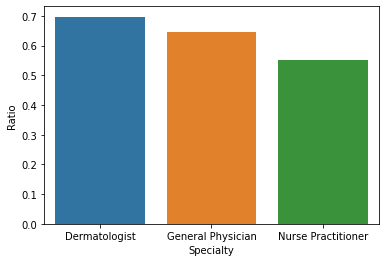

In [ ]:
sns.barplot(y = 'Ratio', x ='Specialty', data = df_Specialty)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
# Calculate the MSE
mse = mean_squared_error(y_test_f, y_pred_f)
print(f'MSE: {mse:.2f}')
rmse = math.sqrt(mse)
print(f'RMSE: {rmse:.2f}')
r2 = r2_score(y_test_f, y_pred_f)
print(f'R2: {r2:.2f}')

In [ ]:
df_HVC.groupby(['Physician_Segment']).sum()['Brand_Rx']

Physician_Segment
1-High      229626.494
2-Medium     97432.934
3-Low        62152.625
Name: Brand_Rx, dtype: float64

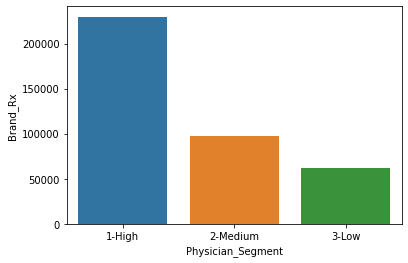

In [ ]:
sns.barplot(x = 'Physician_Segment', y ='Brand_Rx', data = df_HVC.groupby(['Physician_Segment']).sum()['Brand_Rx'].to_frame().reset_index())

**Observation**

For the different promotional strategies adopted, among the **Physician_Segmen**t, High Segment has great impact on Brand_Rx followed by Medium  and then Low Practitioner

In [ ]:
df_Physician_Segment = df_HVC.groupby(['Physician_Segment']).sum()['Brand_Rx'].to_frame().reset_index()
df_Physician_Segment

,Physician_Segment,Brand_Rx
0,1-High,229626.494
1,2-Medium,97432.934
2,3-Low,62152.625


In [ ]:
df_HVC['Physician_Segment'].value_counts()

3-Low       252966
2-Medium    187302
1-High      129732
Name: Physician_Segment, dtype: int64

In [ ]:
df_Physician_Segment['Total'] = [252966, 187302, 129732]
df_Physician_Segment

,Physician_Segment,Brand_Rx,Total
0,1-High,229626.494,252966
1,2-Medium,97432.934,187302
2,3-Low,62152.625,129732


In [ ]:
df_Physician_Segment['Ratio'] = df_Physician_Segment["Brand_Rx"]/df_Physician_Segment["Total"] 

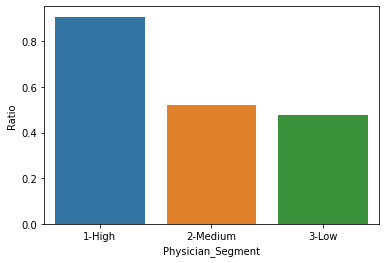

In [ ]:
sns.barplot(y = 'Ratio', x ='Physician_Segment', data = df_Physician_Segment)

Observation

For the different promotional strategies adopted, among the Physician_Segment, **High Segment** has great impact on Brand_Rx followed by Medium and then Low Practitioner, some kind of Ordinal encoding should be done.

### Mean Encoding

In [ ]:
Physician_Segment_mean = df_HVC.groupby('Physician_Segment')['Brand_Rx'].mean()

# Create a new column 'color_encoded' and map the mean values to the corresponding categories
df_HVC['Physician_Segment_encoded'] = df_HVC['Physician_Segment'].map(Physician_Segment_mean)

In [ ]:
df_HVC['Physician_Segment_encoded'].unique()

array([0.24569557, 1.77000658, 0.52019164])

In [ ]:
Physician_Segment_mean = df_HVC.groupby('Specialty')['Brand_Rx'].mean()
Physician_Segment_mean

Specialty
Dermatologist         0.697069
General Physician     0.643960
Nurse Practitioner    0.550447
Name: Brand_Rx, dtype: float64

In [ ]:
df_HVC

,Physician_ID,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Vouchers_Dropped,Specialty,Physician_Segment_encoded
0,axt00001,0.0,2.80567,1,0,3-Low,0,0,Dermatologist,0.245696
1,axt00001,0.0,20.57312,1,0,3-Low,0,0,Dermatologist,0.245696
2,axt00001,0.0,6.16010,1,0,3-Low,0,0,Dermatologist,0.245696
3,axt00001,0.0,8.95501,1,5,3-Low,0,0,Dermatologist,0.245696
4,axt00001,0.0,9.13793,1,0,3-Low,0,0,Dermatologist,0.245696
...,...,...,...,...,...,...,...,...,...,...
569995,axt10000,0.0,2.45597,0,0,3-Low,1,0,Dermatologist,0.245696
569996,axt10000,0.0,2.38065,0,0,3-Low,0,0,Dermatologist,0.245696
569997,axt10000,0.0,7.42171,0,0,3-Low,1,0,Dermatologist,0.245696
569998,axt10000,0.0,5.39345,0,0,3-Low,1,0,Dermatologist,0.245696


In [ ]:
df_HVC.groupby(['Physician_Segment','Specialty']).sum()['Brand_Rx'].to_frame().reset_index()

,Physician_Segment,Specialty,Brand_Rx
0,1-High,Dermatologist,203831.089
1,1-High,General Physician,23622.264
2,1-High,Nurse Practitioner,2173.141
3,2-Medium,Dermatologist,59291.861
4,2-Medium,General Physician,28663.208
5,2-Medium,Nurse Practitioner,9477.865
6,3-Low,Dermatologist,55296.993
7,3-Low,General Physician,6113.320
8,3-Low,Nurse Practitioner,742.312


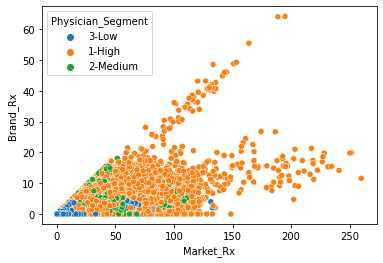

In [ ]:
sns.scatterplot(x = 'Market_Rx', y = 'Brand_Rx',hue ='Physician_Segment', data= df_HVC)

In [ ]:
df_HVC[df_HVC['Physician_Segment'] == '1-High']['Market_Rx'].corr(df_HVC['Brand_Rx'])

0.6306452734068294

In [ ]:
df_HVC[df_HVC['Physician_Segment'] == '3-Low']['Market_Rx'].corr(df_HVC['Brand_Rx'])

0.3708052001988825

In [ ]:
df_HVC[df_HVC['Physician_Segment'] == '2-Medium']['Market_Rx'].corr(df_HVC['Brand_Rx'])

0.4781019184342936

**Observation** 

It can be seen that the **Market_Rx** column least contribute to the prediction of **Brand_Rx**, so we can confidently drop this column

In [ ]:
df_HVC.drop('Market_Rx', axis =1, inplace = True)

In [ ]:
df_HVC.head()

,Physician_ID,Brand_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Vouchers_Dropped,Specialty,Physician_Segment_encoded
0,axt00001,0.0,1,0,3-Low,0,0,Dermatologist,0.245696
1,axt00001,0.0,1,0,3-Low,0,0,Dermatologist,0.245696
2,axt00001,0.0,1,0,3-Low,0,0,Dermatologist,0.245696
3,axt00001,0.0,1,5,3-Low,0,0,Dermatologist,0.245696
4,axt00001,0.0,1,0,3-Low,0,0,Dermatologist,0.245696


In [ ]:
df_HVC['Vouchers_Dropped'].isin([0]).sum()

563103

**Observation**

1. Almost all of the values under this column is 0 so we will better    drop this column

In [ ]:
df_HVC.drop('Vouchers_Dropped', axis =1, inplace = True)

In [ ]:
df_HVC.head()

,Physician_ID,Brand_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Specialty,Physician_Segment_encoded
0,axt00001,0.0,1,0,3-Low,0,Dermatologist,0.245696
1,axt00001,0.0,1,0,3-Low,0,Dermatologist,0.245696
2,axt00001,0.0,1,0,3-Low,0,Dermatologist,0.245696
3,axt00001,0.0,1,5,3-Low,0,Dermatologist,0.245696
4,axt00001,0.0,1,0,3-Low,0,Dermatologist,0.245696


In [ ]:
df_HVC['Emails_Delivered'].isin([0]).sum()

472071

In [ ]:
df_HVC.to_excel('data.xlsx', index=False)

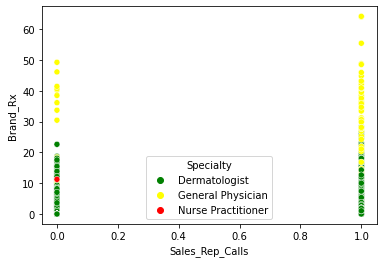

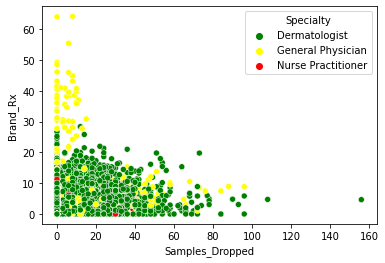

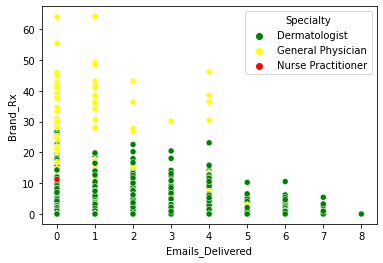

In [ ]:
columns = ['Sales_Rep_Calls','Samples_Dropped', 'Emails_Delivered']      

for feat in columns:
    data = pd.concat([df_HVC[feat], df_HVC['Brand_Rx']], axis = 1)
    sns.scatterplot(x = feat, y = 'Brand_Rx',hue = 'Specialty',palette = ['green', 'yellow', 'red'], data = df_HVC)
    plt.show()

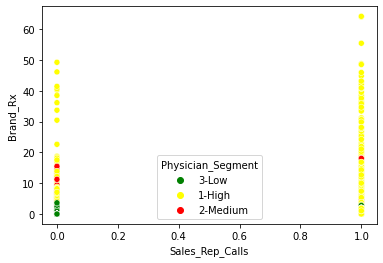

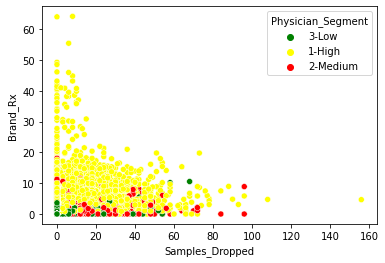

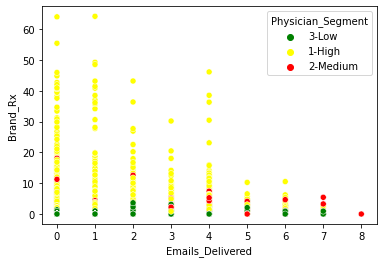

In [ ]:
for feat in columns:
    data = pd.concat([df_HVC[feat], df_HVC['Brand_Rx']], axis = 1)
    sns.scatterplot(x = feat, y = 'Brand_Rx',hue = 'Physician_Segment',palette = ['green', 'yellow', 'red'], data = df_HVC)
    plt.show()

In [ ]:
df_HVC.drop('Physician_ID', axis =1, inplace =True)

In [ ]:
df_HVC.columns

Index(['Brand_Rx', 'Sales_Rep_Calls', 'Samples_Dropped', 'Physician_Segment',
       'Emails_Delivered', 'Specialty', 'Physician_Segment_encoded'],
      dtype='object')

In [ ]:
df_HVC = df_HVC.reindex(columns=['Sales_Rep_Calls', 'Samples_Dropped', 'Physician_Segment',
                        'Emails_Delivered', 'Specialty', 'Physician_Segment_encoded', 'Brand_Rx'])

In [ ]:
df_HVC

,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Specialty,Physician_Segment_encoded,Brand_Rx
0,1,0,3-Low,0,Dermatologist,0.245696,0.0
1,1,0,3-Low,0,Dermatologist,0.245696,0.0
2,1,0,3-Low,0,Dermatologist,0.245696,0.0
3,1,5,3-Low,0,Dermatologist,0.245696,0.0
4,1,0,3-Low,0,Dermatologist,0.245696,0.0
...,...,...,...,...,...,...,...
569995,0,0,3-Low,1,Dermatologist,0.245696,0.0
569996,0,0,3-Low,0,Dermatologist,0.245696,0.0
569997,0,0,3-Low,1,Dermatologist,0.245696,0.0
569998,0,0,3-Low,1,Dermatologist,0.245696,0.0


In [ ]:
df_HVC.drop('Specialty', axis = 1, inplace = True)

In [ ]:
df_HVC

,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Physician_Segment_encoded,Brand_Rx
0,1,0,3-Low,0,0.245696,0.0
1,1,0,3-Low,0,0.245696,0.0
2,1,0,3-Low,0,0.245696,0.0
3,1,5,3-Low,0,0.245696,0.0
4,1,0,3-Low,0,0.245696,0.0
...,...,...,...,...,...,...
569995,0,0,3-Low,1,0.245696,0.0
569996,0,0,3-Low,0,0.245696,0.0
569997,0,0,3-Low,1,0.245696,0.0
569998,0,0,3-Low,1,0.245696,0.0


In [ ]:
df_HVC.to_excel('HVC_final.xlsx', index=False)